In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [2]:
men = pd.read_csv(r"C:\Users\USER\Desktop\men_results.csv")

In [3]:
women = pd.read_csv(r"C:\Users\USER\Desktop\women_results.csv")

In [4]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [5]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [6]:
#Since we want to consolidate the two datasets, we created a distinguishing factor
men["gender"] = "men"
women["gender"] = "women"

In [7]:
both = pd.concat([men,women],ignore_index = True)

In [8]:
both.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49237 entries, 0 to 49236
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49237 non-null  int64 
 1   date        49237 non-null  object
 2   home_team   49237 non-null  object
 3   away_team   49237 non-null  object
 4   home_score  49237 non-null  int64 
 5   away_score  49237 non-null  int64 
 6   tournament  49237 non-null  object
 7   gender      49237 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.0+ MB


In [9]:
both.value_counts("tournament")

tournament
Friendly                                17630
FIFA World Cup qualification             8050
UEFA Euro qualification                  4030
African Cup of Nations qualification     1990
FIFA World Cup                           1248
                                        ...  
Real Madrid 75th Anniversary Cup            1
Copa Confraternidad                         1
FIFA 75th Anniversary Cup                   1
TIFOCO Tournament                           1
Évence Coppée Trophy                        1
Name: count, Length: 159, dtype: int64

In [10]:
both["date"] = pd.to_datetime(both["date"], errors = 'coerce')

In [11]:
#Filter the concerned data
both_wc = both[both["tournament"] == 'FIFA World Cup']
df = both_wc[both_wc["date"] >= "2002-01-01"]

In [12]:
df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 25164 to 48822
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  584 non-null    int64         
 1   date        584 non-null    datetime64[ns]
 2   home_team   584 non-null    object        
 3   away_team   584 non-null    object        
 4   home_score  584 non-null    int64         
 5   away_score  584 non-null    int64         
 6   tournament  584 non-null    object        
 7   gender      584 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 41.1+ KB


In [13]:
df["total_goals"] = df["away_score"] + df["home_score"]

C:\Users\USER\AppData\Local\Temp\ipykernel_2792\2233561317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_goals"] = df["away_score"] + df["home_score"]


In [14]:
women_goals = df[df["gender"] == "women"]["total_goals"]

In [15]:
men_goals = df[df["gender"] == "men"]["total_goals"]

In [16]:
women_goals.count(), men_goals.count()

(200, 384)

In [ ]:
# We'll check if the distribution is normal or not

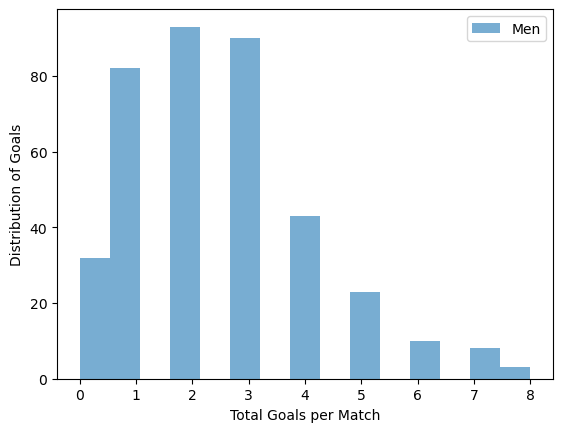

In [17]:
plt.hist(men_goals, bins = 15, alpha = 0.6, label = "Men")
plt.xlabel('Total Goals per Match')
plt.ylabel('Distribution of Goals') 
plt.legend()
plt.show()           

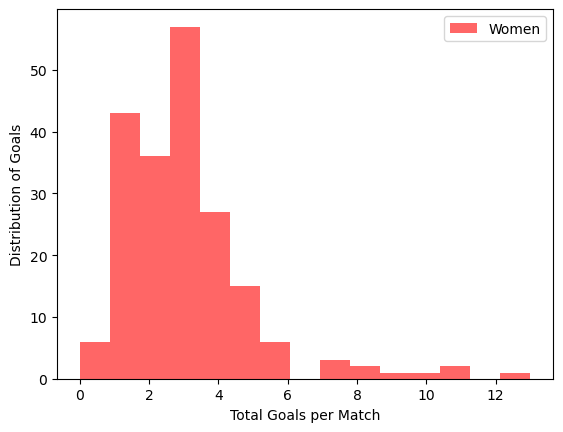

In [18]:

plt.hist(women_goals, bins = 15, alpha = 0.6, color = "red", label = "Women")
plt.xlabel('Total Goals per Match')
plt.ylabel('Distribution of Goals') 
plt.legend()
plt.show()  

In [19]:
shapiro(women_goals)
shapiro(men_goals)

ShapiroResult(statistic=0.9266493059134338, pvalue=8.894989197030093e-13)

In [25]:
# Because there are two independent groups, men's and women's, this scenerio requires an unpaired two-sample test. We consider using Wilcoxon-Mann-Whiney test.
u_stat, p_value = mannwhitneyu(women_goals, men_goals, alternative = 'greater' #women > men
                              )

In [21]:
p_value

0.005106609825443641

In [22]:
alpha = 0.10

In [23]:
if p_value < alpha:
    decision = "Reject the null hypothesis"
else:
    decison = "Fail to reject the null hypothesis"
decision

'Reject the null hypothesis'

In [24]:
print("Hence, we conclude that the mean number of goals in women's international soccer is greater than men's")

Hence, we conclude that the mean number of goals in women's international soccer is greater than men's
